In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

C:\Users\Liza\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [55]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.706333,NaN,NaN
1,-0.015347,NaN,NaN
2,-0.869753,NaN,-1.616506
3,0.092374,NaN,0.939923
4,0.208831,-0.291432,0.357815
5,-0.514373,1.297142,0.358801
6,0.344445,2.116611,0.564447


In [16]:
df.fillna(0)

,0,1,2
0,-0.706333,0.000000,0.000000
1,-0.015347,0.000000,0.000000
2,-0.869753,0.000000,-1.616506
3,0.092374,0.000000,0.939923
4,0.208831,-0.291432,0.357815
5,-0.514373,1.297142,0.358801
6,0.344445,2.116611,0.564447


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.706333,0.500000,0.000000
1,-0.015347,0.500000,0.000000
2,-0.869753,0.500000,-1.616506
3,0.092374,0.500000,0.939923
4,0.208831,-0.291432,0.357815
5,-0.514373,1.297142,0.358801
6,0.344445,2.116611,0.564447


In [18]:
df.fillna(method="bfill")

,0,1,2
0,-0.706333,-0.291432,-1.616506
1,-0.015347,-0.291432,-1.616506
2,-0.869753,-0.291432,-1.616506
3,0.092374,-0.291432,0.939923
4,0.208831,-0.291432,0.357815
5,-0.514373,1.297142,0.358801
6,0.344445,2.116611,0.564447


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-0.706333,NaN,-1.616506
1,-0.015347,NaN,-1.616506
2,-0.869753,-0.291432,-1.616506
3,0.092374,-0.291432,0.939923
4,0.208831,-0.291432,0.357815
5,-0.514373,1.297142,0.358801
6,0.344445,2.116611,0.564447


In [20]:
df.fillna(data.mean())

,0,1,2
0,-0.706333,6.500000,3.000000
1,-0.015347,6.500000,3.000000
2,-0.869753,6.500000,-1.616506
3,0.092374,6.500000,0.939923
4,0.208831,-0.291432,0.357815
5,-0.514373,1.297142,0.358801
6,0.344445,2.116611,0.564447


In [21]:
df.fillna(data.median())

,0,1,2
0,-0.706333,6.500000,3.000000
1,-0.015347,6.500000,3.000000
2,-0.869753,6.500000,-1.616506
3,0.092374,6.500000,0.939923
4,0.208831,-0.291432,0.357815
5,-0.514373,1.297142,0.358801
6,0.344445,2.116611,0.564447


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

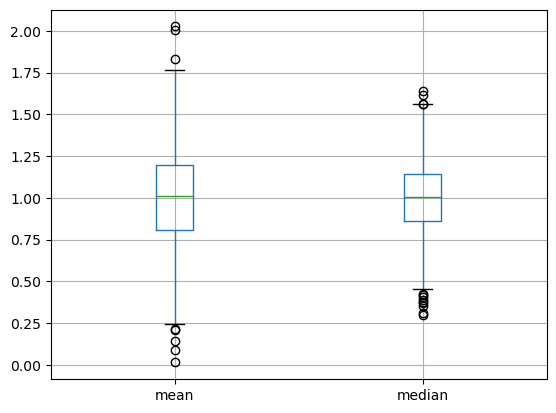

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.706333,NaN,NaN,1
1,-0.015347,NaN,NaN,1
2,-0.869753,NaN,-1.616506,0
3,0.092374,NaN,0.939923,0
4,0.208831,-0.291432,0.357815,0
5,-0.514373,1.297142,0.358801,0
6,0.344445,2.116611,0.564447,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [45]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

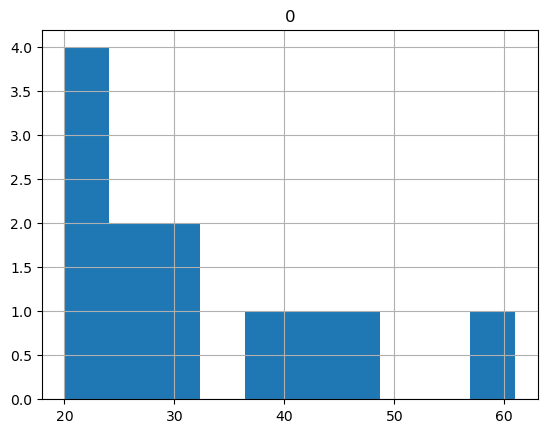

In [46]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [47]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [48]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [172]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [173]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

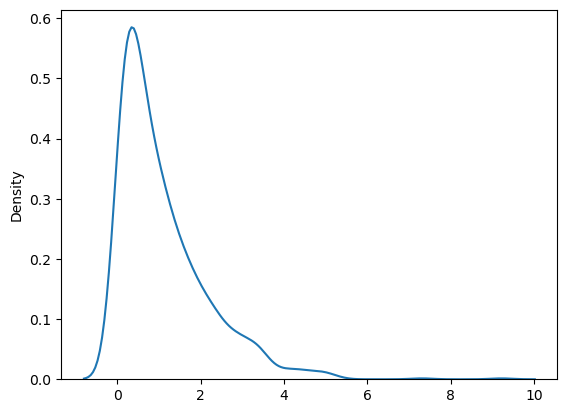

In [176]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

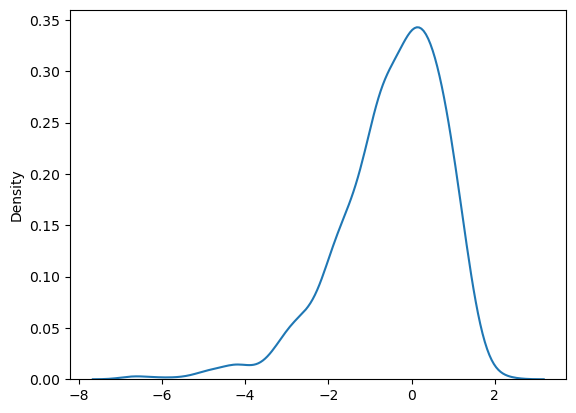

In [179]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

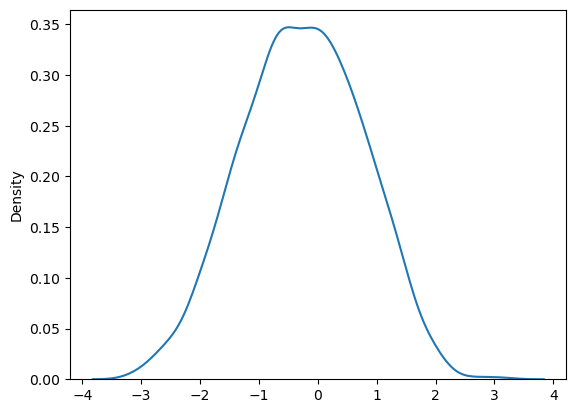

In [180]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [181]:
best_lambda

0.2762186885938159

# Домашнее задание

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [52]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

## Baseline

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [54]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
reg = LinearRegression().fit(train_X, train_y)

In [56]:
reg.score(train_X, train_y)

0.4555406785040047

In [57]:
mean_squared_error(reg.predict(train_X), train_y)

29840.121250865304

In [58]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [59]:
scores

{'fit_time': array([0.02551413, 0.02898645, 0.02399659]),
 'score_time': array([0.00600266, 0.00500464, 0.0059948 ]),
 'test_score': array([-29836.8590711 , -29618.75539267, -30344.6536926 ])}

In [60]:
mean_squared_error(reg.predict(test_X), test_y)

31021.0243998544

### Моя модель
Логика: в связи с тем, что у нас в данных большое количество объясняющих переменных, вполне вероятна мультиколлинеарность, которая приводит к переобучению и, соответственно, низкому качеству модели. Одним из вариантов решения такой задачи является применение регуляризации: моделей Lasso или Ridge.

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

In [70]:
x = df.drop(["target"], axis=1)
y = df[["target"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=13)

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

x_test_st = scaler.transform(x_test)

## Ridge

In [71]:
# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[[  0.96425528   1.2929036   19.54998294  22.83308333 -22.21891266
   -4.15913827  -2.53167905 103.15571567 -14.85667718  36.88532714
  -11.17061345 -37.81212282  23.17171012   3.72903924 -19.18699573
    3.53327814   1.79145957   9.49902991   2.16920153  20.43125325
  -21.3035276  -18.65671158   9.41423306  -4.84512938  52.87206648
   54.86214088  -4.88462601  13.55306387  -2.10412012   9.68308268
   -1.47110529]] [2659.96282874]


In [72]:
x_test_st = scaler.transform(x_test)

# делаем прогнозы
predictions = model.predict(x_test_st)

In [73]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 31166.463499243364
Среднеквадратическая ошибка (RMSE): 176.54026027862133
Средняя абсолютная ошибка (MAE): 118.92667758405793
Средняя абсолютная ошибка  (MAPE): 0.044530674007592155
Коэффициент детерминации (R^2): 0.4521405900980471


## Lasso

In [75]:
# создадим модель линейной регрессии
model = Lasso()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[  0.           0.          17.81317431   3.04094164 -20.74301378
  -3.07481109   0.         100.19501033 -12.10366472  33.80888254
 -11.34192395 -35.74685321  21.89181624   1.38678201 -16.33135126
   2.49476002   0.42035129   7.78188373   1.52686688  18.94847903
   0.         -17.1167576    8.66866159  -3.767525    52.69222625
  53.21022883  -4.82024281  12.79004533  -1.23689453   9.00848024
  -0.28827094] [2659.96282874]


In [76]:
x_test_st = scaler.transform(x_test)

# делаем прогнозы
predictions = model.predict(x_test_st)

In [77]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 31219.290991359216
Среднеквадратическая ошибка (RMSE): 176.68981575450016
Средняя абсолютная ошибка (MAE): 118.79408736796519
Средняя абсолютная ошибка  (MAPE): 0.04447083159671183
Коэффициент детерминации (R^2): 0.45121196248337103


### Итог:
значения R^2 в моделях достаточно низкие

In [78]:
import seaborn as sns

# строим pairplot
sns.pairplot(df)

Error in callback <function flush_figures at 0x000002086015A8B0> (for post_execute):


KeyboardInterrupt: 

In [109]:
m = df.corr()
m
#m[m < 1].max()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
index,1.000000,0.003898,-0.001457,-0.005556,-0.000464,-0.000202,-0.002258,-0.001537,0.001591,-0.000337,...,0.004611,-0.004249,0.000466,-0.001526,0.000074,-0.006934,0.006834,0.005661,-0.001654,0.002701
back-suspension,0.003898,1.000000,0.008851,-0.193989,-0.105450,-0.137078,-0.119261,-0.160858,0.061687,-0.029760,...,-0.102584,-0.031057,-0.042323,-0.323143,-0.021228,-0.116755,-0.019685,-0.016126,0.043355,-0.159912
battery-capacity,-0.001457,0.008851,1.000000,-0.031922,-0.057803,-0.043129,0.158632,-0.145231,0.065207,0.056365,...,0.022147,-0.008994,0.006409,-0.071311,-0.102719,0.020826,0.002595,-0.001942,0.024069,0.025703
charge-time,-0.005556,-0.193989,-0.031922,1.000000,0.018219,0.046768,0.107905,0.121424,-0.007057,0.089422,...,0.080451,-0.012119,-0.023785,0.089222,-0.032347,0.207838,-0.027029,-0.048904,-0.030769,0.110034
compression,-0.000464,-0.105450,-0.057803,0.018219,1.000000,0.130448,-0.084557,-0.033044,0.167183,0.252255,...,0.195110,-0.111495,0.054701,0.266837,0.005798,-0.070765,0.000219,0.006494,-0.003346,0.023138
consumption-mixed,-0.000202,-0.137078,-0.043129,0.046768,0.130448,1.000000,0.079701,0.125600,-0.004348,0.316506,...,0.265524,-0.080412,0.022038,0.307298,-0.064671,-0.113843,-0.033141,0.024245,-0.014838,0.118195
cylinders-order,-0.002258,-0.119261,0.158632,0.107905,-0.084557,0.079701,1.000000,0.720077,-0.074468,-0.052457,...,0.033961,0.102481,-0.014392,0.224373,0.008260,0.232579,-0.023909,-0.011807,0.000143,0.376272
cylinders-value,-0.001537,-0.160858,-0.145231,0.121424,-0.033044,0.125600,0.720077,1.000000,-0.101289,-0.161831,...,0.033480,0.125640,-0.028327,0.302997,0.085953,0.217498,-0.044688,-0.014459,-0.017780,0.472177
engine-feeding,0.001591,0.061687,0.065207,-0.007057,0.167183,-0.004348,-0.074468,-0.101289,1.000000,0.232445,...,0.127065,-0.057243,0.076379,0.042067,0.031153,-0.110842,0.012638,0.026376,-0.026445,0.012235
engine-start,-0.000337,-0.029760,0.056365,0.089422,0.252255,0.316506,-0.052457,-0.161831,0.232445,1.000000,...,0.504745,-0.229782,0.065405,0.327209,-0.399186,-0.136376,-0.026436,0.038331,0.028909,0.150944


In [96]:
df_1 = df[['target', 'battery-capacity', 'charge-time', 'consumption-mixed', 'cylinders-order','cylinders-value', 'engine-start', 'engine-stop', 'luxury','max-speed', 'weight', 'configurations_auto-premiere', 'supergen_year-stop']]      

<AxesSubplot:>

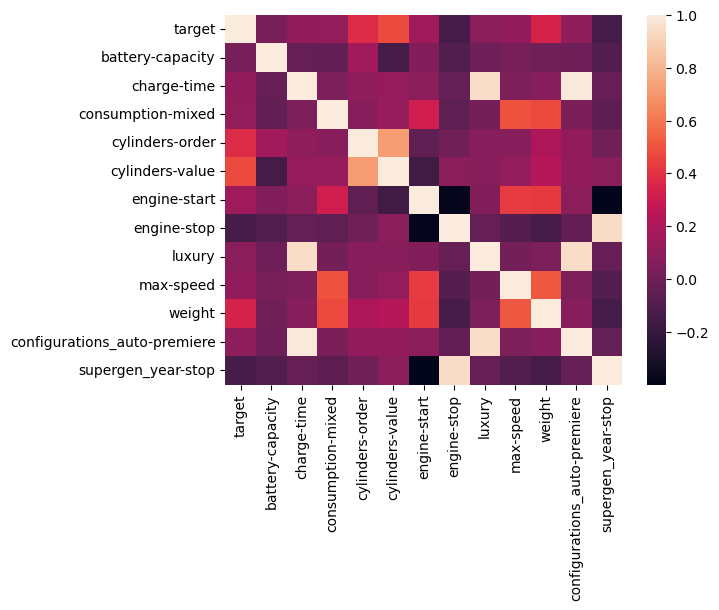

In [97]:
import seaborn as sns

sns.heatmap(df_1.corr())

<AxesSubplot:>

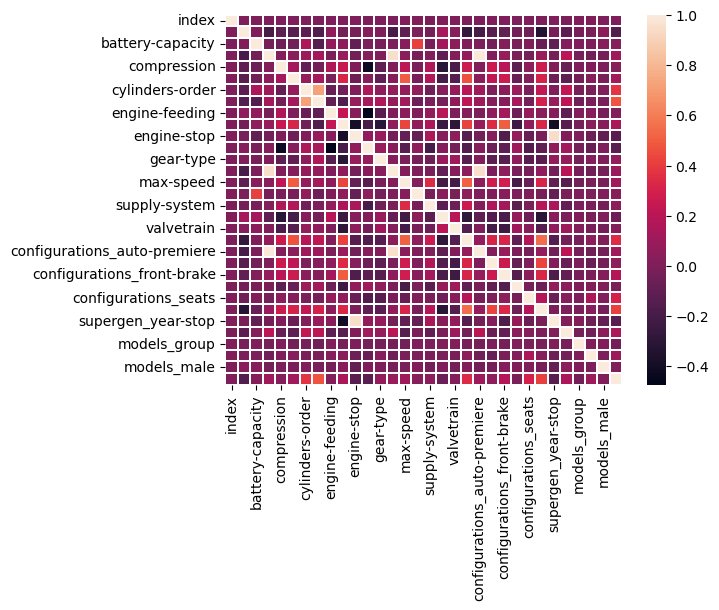

In [107]:
sns.heatmap(df.corr(), linewidths= .3)

In [110]:
#ручной отбор факторов в модель

# раздяем данные на признаки
x = df[['cylinders-value', 'configurations_tank-volume', 'weight']]
y = df['target']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33) 

In [112]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

In [113]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[87.71278308 53.88550746 31.07797754] 2660.3766331367788


In [114]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

# делаем прогнозы
predictions = model.predict(x_test_st)

In [115]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 38609.58079807395
Среднеквадратическая ошибка (RMSE): 196.49320802021109
Средняя абсолютная ошибка (MAE): 134.18651390391665
Средняя абсолютная ошибка  (MAPE): 0.050319882017213394
Коэффициент детерминации (R^2): 0.32063494856194397
